# In the first cell of the file we are importing all the necessary libraires

In [17]:
# Theese are the libraries that wer are going to use for this project-1

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# In the second step we are loading and perforoming the preprocessing operation on the dataset that we are going to use for this project which is auto-mpg.csv

In [2]:
# This is the dataset that we are using --> auto-mpg dataset
csv_path = "/content/auto-mpg.csv"
df = pd.read_csv(csv_path)

# Preprocessing the dataset by dropping all the unnecessary columns and handling the missing values
df_cleaned = df.drop(columns=['car name', 'origin'], errors='ignore').dropna()

# here we are converting the 'horsepower' to the numeric value if it is present in the dataset
if 'horsepower' in df_cleaned.columns:
    df_cleaned['horsepower'] = pd.to_numeric(df_cleaned['horsepower'], errors='coerce')
    df_cleaned = df_cleaned.dropna()

# Features (X) and target (y)
X = df_cleaned.drop(columns=['mpg'])
y = df_cleaned['mpg']

# Verification purposes
df_cleaned.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


# Now we can confirm that the dataset has been loaded and preprocessed accurately. So we will be proceeding our work onto the next step which is Initializing the weights, predict function and the cost function.


# Initialize weights, predict function, and cost function

In [4]:
# Initializing the weights and also the bias
def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

# Predicting function for our ElasticNet model
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# this is the Compute cost function along with the ElasticNet regularization
def compute_cost(X, y, weights, bias, alpha, l1_ratio):
    m = len(y)
    predictions = predict(X, weights, bias)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # Mean squared error

    # Add the ElasticNet regularization (L1 + L2)
    l1_penalty = l1_ratio * np.sum(np.abs(weights))
    l2_penalty = (1 - l1_ratio) * np.sum(weights ** 2)
    regularization = alpha * (l1_penalty + l2_penalty / 2)

    return cost + regularization


# Developing the Gradient Descent for ELASTICNET

In [5]:
# Gradient Descent for ElasticNet
def gradient_descent(X, y, weights, bias, alpha, l1_ratio, learning_rate, iterations):
    m = len(y)

    for i in range(iterations):
        # Predicting the current values that we have
        predictions = predict(X, weights, bias)

        # Computing the gradients for weights and the bias
        dw = (1 / m) * np.dot(X.T, (predictions - y)) + alpha * (l1_ratio * np.sign(weights) + (1 - l1_ratio) * weights)
        db = (1 / m) * np.sum(predictions - y)

        # Updating the weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            cost = compute_cost(X, y, weights, bias, alpha, l1_ratio)
            print(f"Iteration {i}, Cost: {cost}")

    return weights, bias


# Hence our ElasticNet model has been successfully developed. Now we are going to train our model on our dataset that we are imported at the beginning.

# Training the model using the dataset

In [6]:
# here we are standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_features = X_scaled.shape[1]
weights, bias = initialize_weights(n_features)

# Setting the hyperparameters for the training puproses
alpha = 0.1  # alphs is Regularization strength
l1_ratio = 0.5  # L1 ratio for ElasticNet
learning_rate = 0.01  # Learning rate for gradient descent
iterations = 1000  # Number of iterations

# Now Training the model using gradient descent
weights, bias = gradient_descent(X_scaled, y, weights, bias, alpha, l1_ratio, learning_rate, iterations)

weights, bias


Iteration 0, Cost: 297.95915208035433
Iteration 100, Cost: 43.83943380494187
Iteration 200, Cost: 12.168663849337504
Iteration 300, Cost: 7.8549024275884
Iteration 400, Cost: 7.229680781408786
Iteration 500, Cost: 7.111953779136091
Iteration 600, Cost: 7.070270767906074
Iteration 700, Cost: 7.044493079678062
Iteration 800, Cost: 7.025165460820404
Iteration 900, Cost: 7.010039449548893


(array([-0.76007541, -0.85766705, -0.87658007, -3.27289461, -0.18934052,
         2.44577828]),
 23.44490617780432)

In [8]:
# Make predictions on the dataset
y_pred = predict(X_scaled, weights, bias)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error on the dataset is: {mse:.7f}")

if mse > 20:
    print("Your MSE value if going far from '0', This means that the model is not performing as expected.")
else:
    print("Your MSE value was perfect and the model was very good.")


Mean Squared Error on the dataset is: 12.2155779
Your MSE value was perfect and the model was very good.


# Now as our MSE value is pretty good let us delve into the visualizations

# VISUALIZATIONS

# 1. Actual vs Predicted Values Plot

# This plot shows how well the model's predictions match the actual values. If the model performs well, the points should be close to the diagonal line where y_actual = y_predicted.

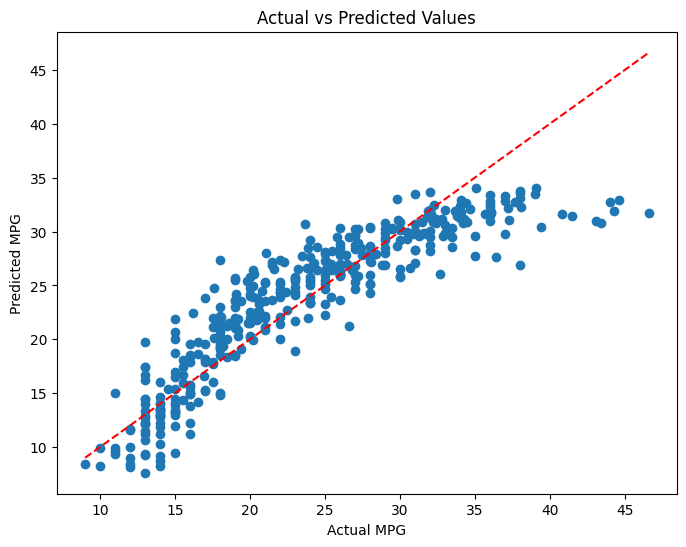

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted Values")
plt.show()


# 2. Residuals vs Predicted Values Plot

# Residuals shows the differences between the actual and the predicted values. In this plot shows whether the residuals are randomly scattered or if there is a pattern, which may indicate model issues.

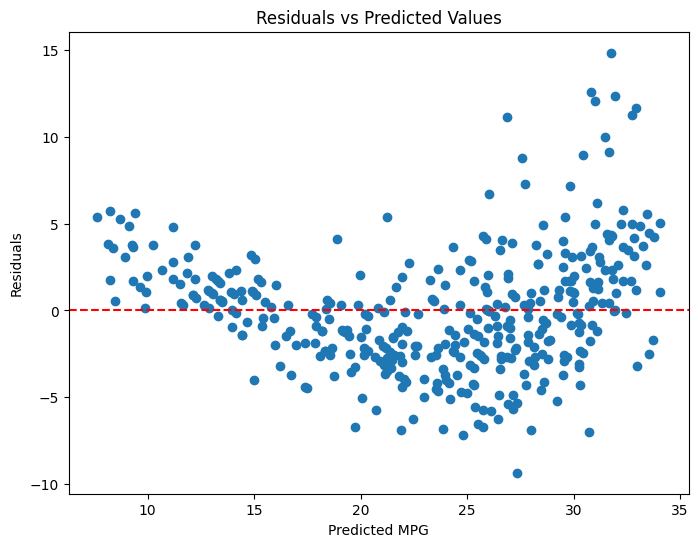

In [12]:
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


# 3. Distribution of Residuals (Histogram + KDE)

# This helps us to check whether the residuals are normally distributed. Ideally, the residuals should follow a normal distribution if the model is well-calibrated.

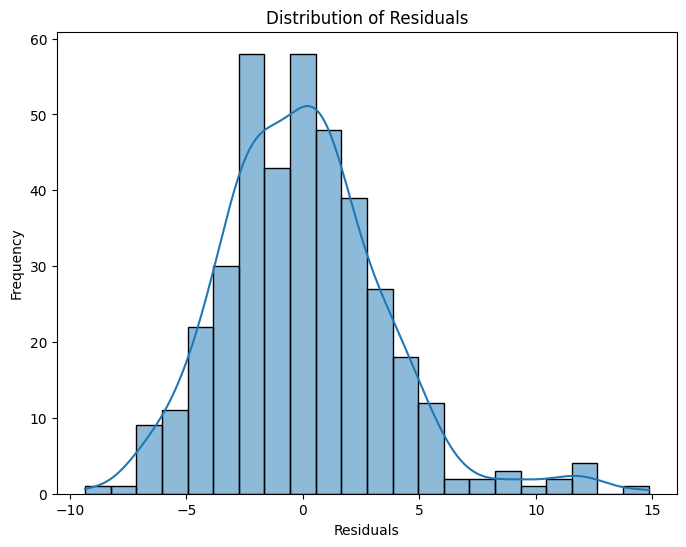

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# 4. Feature Correlation Matrix (Heatmap)

# This will help visualize how different features in the dataset correlate with one another. High correlations between features may indicate multicollinearity, which can affect the model.

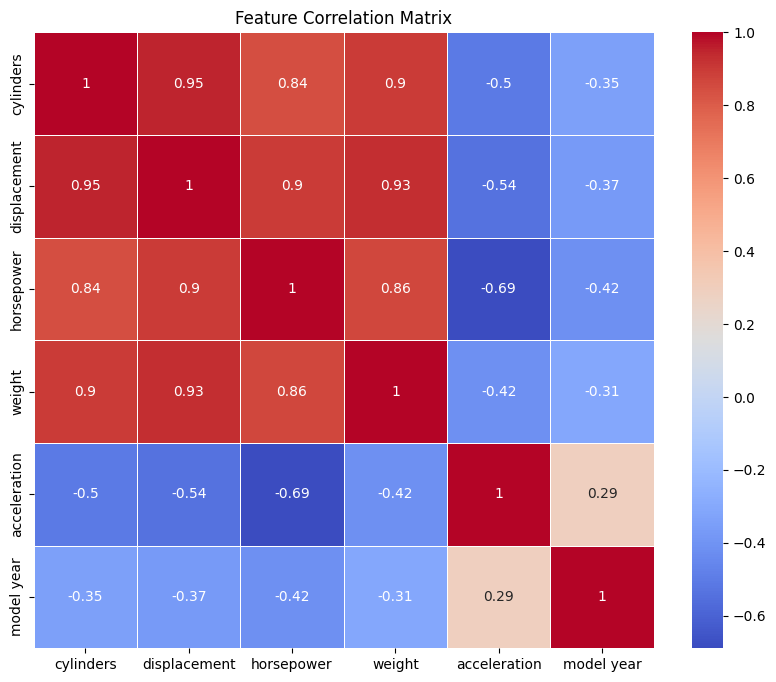

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# 5. Learning Curve (Training Size vs MSE)

# This plot will show us how the model’s performance changes as we increase the size of the training dataset. If the model benefits from more data, we should see a decrease in the Mean Squared Error (MSE).

Iteration 0, Cost: 5.327830683563667
Iteration 100, Cost: 4.836036148055847
Iteration 200, Cost: 4.758165230512063
Iteration 300, Cost: 4.718429289830493
Iteration 400, Cost: 4.689425206241367
Iteration 500, Cost: 4.665888842083404
Iteration 600, Cost: 4.646286031403063
Iteration 700, Cost: 4.629853033719415
Iteration 800, Cost: 4.616053189268152
Iteration 900, Cost: 4.604458387001874
Iteration 0, Cost: 5.961035761468591
Iteration 100, Cost: 5.586645810320094
Iteration 200, Cost: 5.517562091388839
Iteration 300, Cost: 5.494138667533585
Iteration 400, Cost: 5.480684050586976
Iteration 500, Cost: 5.471294095331643
Iteration 600, Cost: 5.464142040432236
Iteration 700, Cost: 5.458510840360137
Iteration 800, Cost: 5.454036144197624
Iteration 900, Cost: 5.450504813290466
Iteration 0, Cost: 5.188382168534357
Iteration 100, Cost: 5.117182655287827
Iteration 200, Cost: 5.1006831551448375
Iteration 300, Cost: 5.093393054209624
Iteration 400, Cost: 5.089135641581467
Iteration 500, Cost: 5.0862536

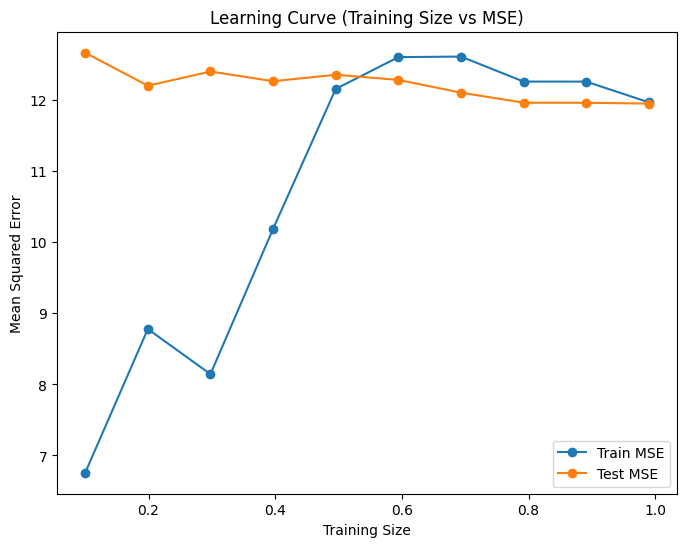

In [18]:
train_sizes = np.linspace(0.1, 0.99, 10)
train_errors = []
test_errors = []

for train_size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_scaled, y, train_size=train_size, random_state=42)
    weights_partial, bias_partial = gradient_descent(X_train_partial, y_train_partial, weights, bias, alpha, l1_ratio, learning_rate, iterations=1000)
    predictions_partial = predict(X_train_partial, weights_partial, bias_partial)

    train_error = mean_squared_error(y_train_partial, predictions_partial)
    test_error = mean_squared_error(y, predict(X_scaled, weights_partial, bias_partial))

    train_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label="Train MSE", marker='o')
plt.plot(train_sizes, test_errors, label="Test MSE", marker='o')
plt.xlabel("Training Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve (Training Size vs MSE)")
plt.legend()
plt.show()


# 6. Predicted vs Actual Values Histogram

# This compares the distribution of predicted values and actual values. If the model is performing well, the predicted distribution should closely match the actual distribution.

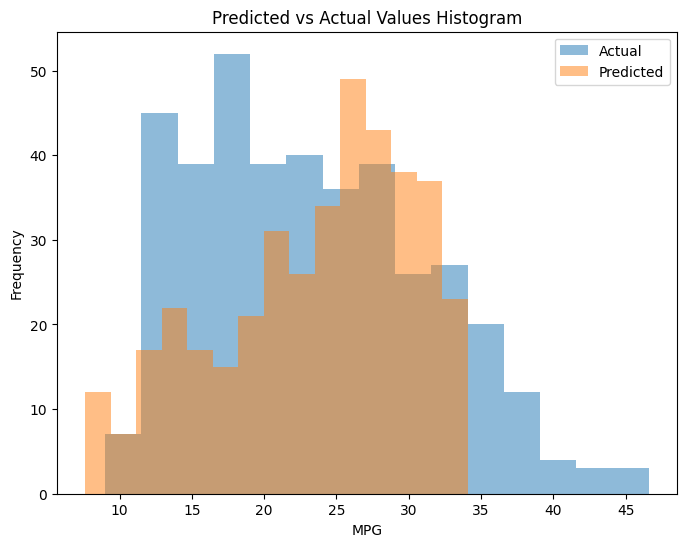

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(y, alpha=0.5, label="Actual", bins=15)
plt.hist(y_pred, alpha=0.5, label="Predicted", bins=15)
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.title("Predicted vs Actual Values Histogram")
plt.legend()
plt.show()


# 7. Coefficients Visualization

# This plot helps us visualize the magnitude and direction of the model’s coefficients. Large positive or negative coefficients show which features have the most influence on the target variable.

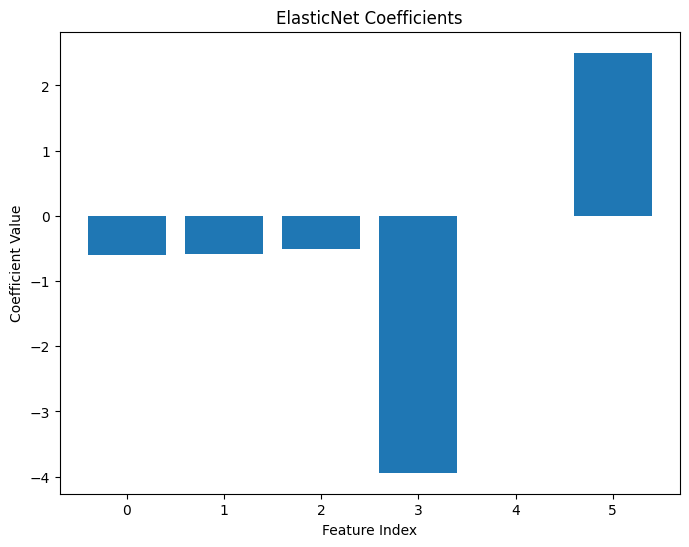

In [20]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(weights)), weights)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("ElasticNet Coefficients")
plt.show()


# 8. MSE over Iterations (Convergence of Gradient Descent)

# Lastly, we can visualize the convergence of the gradient descent process by plotting the MSE over iterations. This will show how quickly the model is learning.

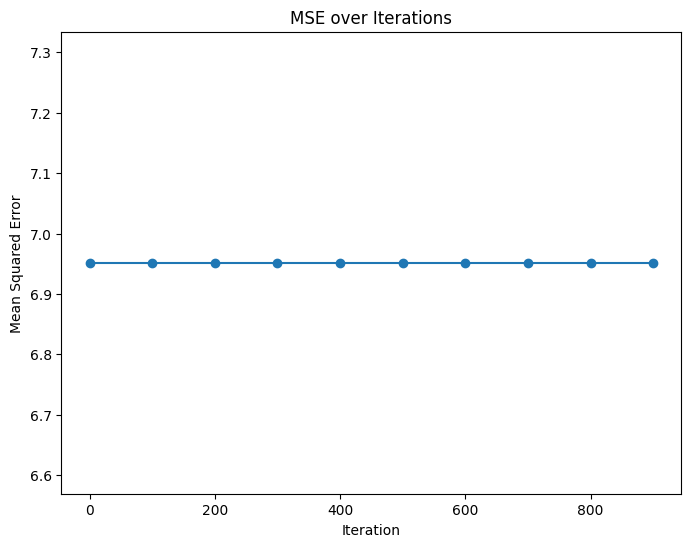

In [21]:
iterations_list = list(range(0, iterations, 100))
mse_list = []

for i in iterations_list:
    mse = compute_cost(X_scaled, y, weights, bias, alpha, l1_ratio)
    mse_list.append(mse)

plt.figure(figsize=(8, 6))
plt.plot(iterations_list, mse_list, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE over Iterations")
plt.show()


# Summary Visualization Benefit:
Performance of Model: Actual versus predicted, residual plots, and learning curves will help us assess the performance of the model.

Error Analysis Residual histograms and residual versus predicted plots allow us to diagnose potential model issues.

Feature Analysis: The correlation matrix presented and the coefficients visualization give insight into how related the features are to each other and to the target variable.
